# _RecoGym_: IPS vs Non-IPS


# Please Note the run time of this notebook is in the many many hours 

In this notebook you shall find comparision of performance of two _`Agents`_:
* _Logistic Regression_ _**without**_ IPS;
* _Logistic Regression_ _**with**_ IPS.

In all cases, an training data will be used as a _Random_ _`Agent`_ has been applied in the _`Environment`_.

**Note:** the evaluation of the data provided in that notebook takes some time.

In [1]:
import gym
import matplotlib.pyplot as plt

%matplotlib notebook
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = [6, 3]

from recogym import build_agent_init, env_1_args, gather_agent_stats, plot_agent_stats

RandomSeed = 42

TrainingDataSamples = (100, 500, 1000, 2000, 3000, 5000, 8000, 10000, 13000, 14000, 15000)
TestingDataSamples = 15000
StatEpochs = 5
StatEpochsNewRandomSeed = True

std_env_args = {
    **env_1_args,
    'random_seed': RandomSeed,
}

env = gym.make('reco-gym-v1')

## _Uniform_ Data Set

In this experiment, we will use a uniform data set obtained after applying so called _Random_ _`Agent`_ i.e. the _`Agent`_ that randomply selects a _`Product`_.

Data uniformity means that _Propensity Score_ is _**always**_ the same. In case of _10_ _`Products`_ $PS=\frac{1}{10}=0.1$.

Import _`Agents`_.

In [2]:
from recogym.agents import LogregPolyAgent, logreg_poly_args
from recogym.agents import LogregMulticlassIpsAgent, logreg_multiclass_ips_args

In [3]:
agent_inits = {
    **build_agent_init(
        'LogReg Poly IPS',
        LogregPolyAgent,
        {
            **logreg_poly_args,
            'with_ips': True,
        }
    ),
    **build_agent_init(
        'LogReg MC IPS',
        LogregMulticlassIpsAgent,
        {
            **logreg_multiclass_ips_args,
        }
    ),
    **build_agent_init(
        'LogReg Poly Non-IPS',
        LogregPolyAgent,
        {
            **logreg_poly_args,
            'with_ips': False,
        }
    ),
}

Gathering statistics...

In [4]:
agent_stats01 = gather_agent_stats(
    env,
    std_env_args,
    {
        'num_products': 10,
        'number_of_flips': 5,
    },
    agent_inits,
    TrainingDataSamples,
    TestingDataSamples,
    StatEpochs,
    StatEpochsNewRandomSeed
)

Agent: LogReg Poly IPS
Start: Num of Offline Users: 100
Start: Agent Training #0
Start: Agent Training #2
Start: Agent Training #1
Start: Agent Training #4
Start: Agent Training #3
Start: Agent Testing #4
Start: Agent Testing #3
Start: Agent Testing #0
Start: Agent Testing #2
Start: Agent Testing #1
End: Agent Testing #3 (1797.3044590950012s)
End: Agent Testing #4 (1808.0352039337158s)
End: Agent Testing #1 (1826.530484199524s)
End: Agent Testing #0 (1830.6906955242157s)
End: Agent Testing #2 (2242.643666267395s)
End: Num of Offline Users: 100 (2242.8422207832336s)
Start: Num of Offline Users: 500
Start: Agent Training #4
Start: Agent Training #1
Start: Agent Training #0
Start: Agent Training #3
Start: Agent Training #2
Start: Agent Testing #4
Start: Agent Testing #3
Start: Agent Testing #2
Start: Agent Testing #0
Start: Agent Testing #1
End: Agent Testing #3 (1875.925725698471s)
End: Agent Testing #2 (1879.5860440731049s)
End: Agent Testing #1 (1889.4607467651367s)
End: Agent Testing 

End: Agent Testing #3 (297.22294330596924s)
End: Num of Offline Users: 2000 (297.45557928085327s)
Start: Num of Offline Users: 3000
Start: Agent Training #4
Start: Agent Training #3
Start: Agent Training #2
Start: Agent Training #0
Start: Agent Training #1
Start: Agent Testing #3
Start: Agent Testing #2
Start: Agent Testing #0
Start: Agent Testing #4
Start: Agent Testing #1
End: Agent Testing #2 (284.5222473144531s)
End: Agent Testing #1 (286.9380428791046s)
End: Agent Testing #4 (287.0548839569092s)
End: Agent Testing #3 (287.7381098270416s)
End: Agent Testing #0 (289.3083407878876s)
End: Num of Offline Users: 3000 (289.57341861724854s)
Start: Num of Offline Users: 5000
Start: Agent Training #0
Start: Agent Training #3
Start: Agent Training #4
Start: Agent Training #2
Start: Agent Training #1
Start: Agent Testing #2
Start: Agent Testing #3
Start: Agent Testing #1
Start: Agent Testing #4
Start: Agent Testing #0
End: Agent Testing #4 (331.4398384094238s)
End: Agent Testing #1 (331.60812

End: Agent Testing #4 (2037.7801575660706s)
End: Agent Testing #3 (2039.4104461669922s)
End: Num of Offline Users: 10000 (2039.8572149276733s)
Start: Num of Offline Users: 13000
Start: Agent Training #2
Start: Agent Training #1
Start: Agent Training #0
Start: Agent Training #3
Start: Agent Training #4
Start: Agent Testing #4
Start: Agent Testing #2
Start: Agent Testing #0
Start: Agent Testing #1
Start: Agent Testing #3
End: Agent Testing #2 (2079.6795525550842s)
End: Agent Testing #0 (2105.7659797668457s)
End: Agent Testing #3 (2122.1428236961365s)
End: Agent Testing #4 (2178.4573159217834s)
End: Agent Testing #1 (2288.306578874588s)
End: Num of Offline Users: 13000 (2288.860973596573s)
Start: Num of Offline Users: 14000
Start: Agent Training #0
Start: Agent Training #4
Start: Agent Training #1
Start: Agent Training #3
Start: Agent Training #2
Start: Agent Testing #4
Start: Agent Testing #2
Start: Agent Testing #3
Start: Agent Testing #0
Start: Agent Testing #1
End: Agent Testing #0 (2

Plotting results...

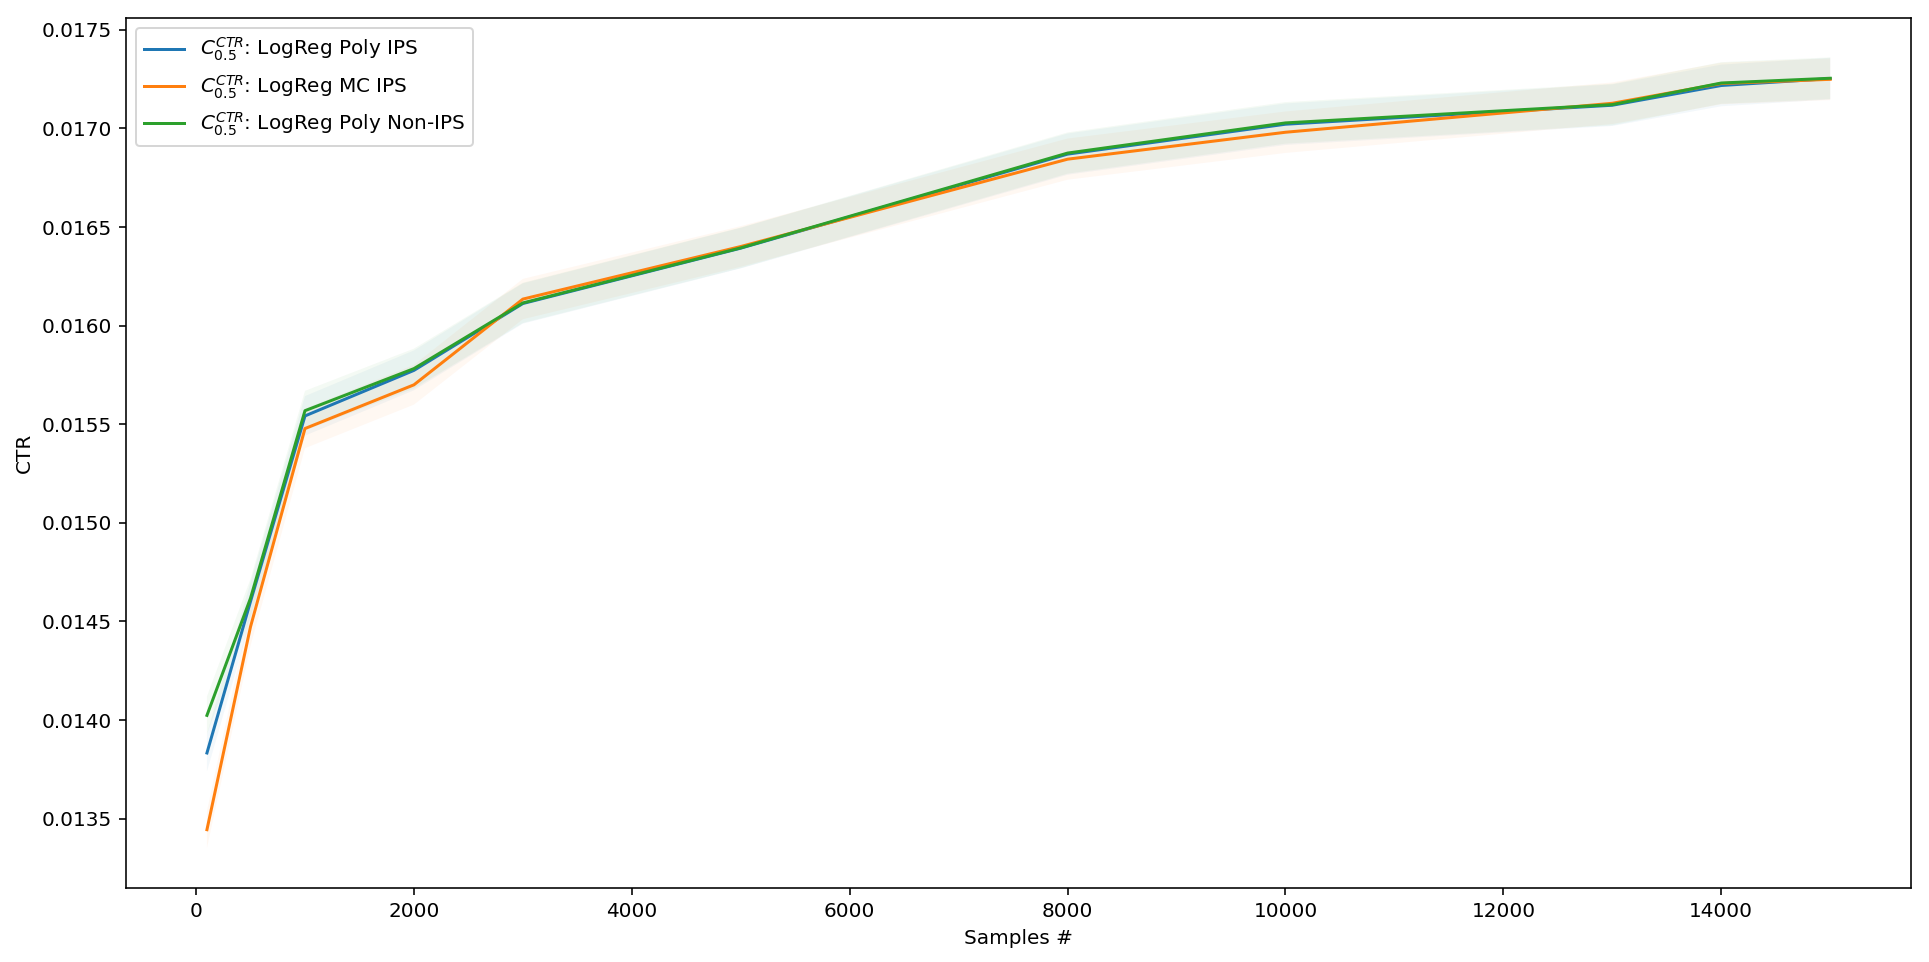

In [5]:
plot_agent_stats(agent_stats01)

<sup>_**Note:**_ here, _`Samples #`_ is the amount of user's data taken for training.</sup>

## _Non-Uniform_ Data Set

On the contrary to the previous case, a _**non**-uniform_ data set will be used.
The data are obtained via using _Organic User Event Counter_ _`Agent`_, i.e. the _`Agent`_ that selects the most popular _`Product`_ (most frequently viewed in _Organic_ _`Events`_) with the highest probability.

In [6]:
from recogym import Configuration
from recogym.agents import OrganicUserEventCounterAgent, organic_user_count_args

Gathering statistics...

In [7]:
agent_stats02 = gather_agent_stats(
    env,
    std_env_args,
    {
        'num_products': 10,
        'number_of_flips': 5,
        'agent': OrganicUserEventCounterAgent(Configuration({
            **organic_user_count_args,
            **std_env_args,
            'select_randomly': True,
        })),
    },
    agent_inits,
    TrainingDataSamples,
    TestingDataSamples,
    StatEpochs,
    StatEpochsNewRandomSeed
)

Agent: LogReg Poly IPS
Start: Num of Offline Users: 100
Start: Agent Training #0
Start: Agent Training #1
Start: Agent Training #3
Start: Agent Training #2
Start: Agent Training #4
Start: Agent Testing #0
Start: Agent Testing #1
Start: Agent Testing #2
Start: Agent Testing #3
Start: Agent Testing #4
End: Agent Testing #1 (1801.902762413025s)
End: Agent Testing #3 (1814.5190861225128s)
End: Agent Testing #4 (1817.0288858413696s)
End: Agent Testing #2 (1818.1759209632874s)
End: Agent Testing #0 (2265.4033217430115s)
End: Num of Offline Users: 100 (2265.6292266845703s)
Start: Num of Offline Users: 500
Start: Agent Training #0
Start: Agent Training #3
Start: Agent Training #2
Start: Agent Training #1
Start: Agent Training #4
Start: Agent Testing #4
Start: Agent Testing #0
Start: Agent Testing #3
Start: Agent Testing #2
Start: Agent Testing #1
End: Agent Testing #1 (1916.9961535930634s)
End: Agent Testing #4 (1958.3680062294006s)
End: Agent Testing #3 (1966.4427201747894s)
End: Agent Testin

End: Agent Testing #1 (455.32191586494446s)
End: Num of Offline Users: 2000 (455.6169159412384s)
Start: Num of Offline Users: 3000
Start: Agent Training #4
Start: Agent Training #0
Start: Agent Training #2
Start: Agent Training #1
Start: Agent Training #3
Start: Agent Testing #0
Start: Agent Testing #1
Start: Agent Testing #4
Start: Agent Testing #2
Start: Agent Testing #3
End: Agent Testing #0 (479.318470954895s)
End: Agent Testing #4 (547.0708658695221s)
End: Agent Testing #1 (548.2455453872681s)
End: Agent Testing #2 (556.9925065040588s)
End: Agent Testing #3 (572.9061887264252s)
End: Num of Offline Users: 3000 (573.2254211902618s)
Start: Num of Offline Users: 5000
Start: Agent Training #1
Start: Agent Training #0
Start: Agent Training #2
Start: Agent Training #3
Start: Agent Training #4
Start: Agent Testing #1
Start: Agent Testing #0
Start: Agent Testing #2
Start: Agent Testing #4
Start: Agent Testing #3
End: Agent Testing #0 (581.3446168899536s)
End: Agent Testing #1 (622.46717715

End: Agent Testing #0 (2521.753465652466s)
End: Agent Testing #4 (2640.742980480194s)
End: Num of Offline Users: 10000 (2641.307643175125s)
Start: Num of Offline Users: 13000
Start: Agent Training #1
Start: Agent Training #0
Start: Agent Training #3
Start: Agent Training #2
Start: Agent Training #4
Start: Agent Testing #3
Start: Agent Testing #1
Start: Agent Testing #4
Start: Agent Testing #2
Start: Agent Testing #0
End: Agent Testing #0 (2432.998384475708s)
End: Agent Testing #1 (2488.246004343033s)
End: Agent Testing #2 (2563.986263990402s)
End: Agent Testing #4 (2571.883232831955s)
End: Agent Testing #3 (2939.101254463196s)
End: Num of Offline Users: 13000 (2939.6213014125824s)
Start: Num of Offline Users: 14000
Start: Agent Training #4
Start: Agent Training #2
Start: Agent Training #1
Start: Agent Training #3
Start: Agent Training #0
Start: Agent Testing #3
Start: Agent Testing #4
Start: Agent Testing #2
Start: Agent Testing #1
Start: Agent Testing #0
End: Agent Testing #3 (2558.48

Plotting results...

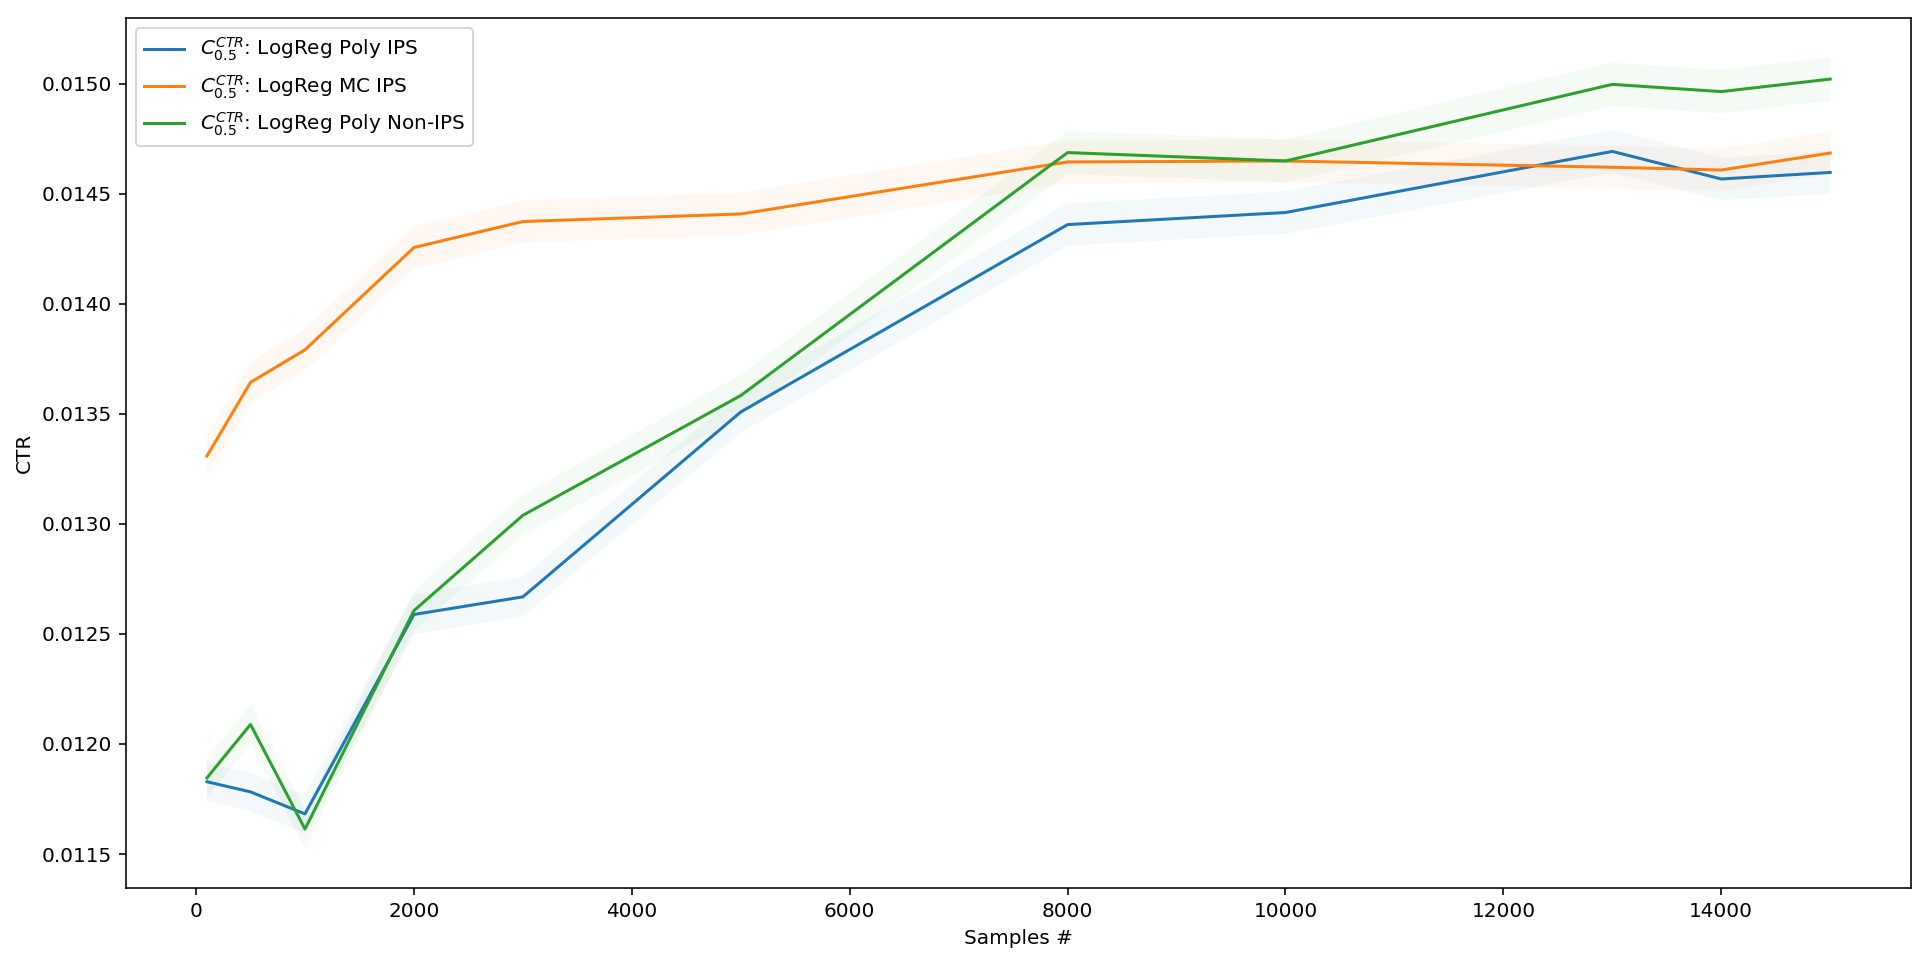

In [8]:
plot_agent_stats(agent_stats02)

<sup>_**Note:**_ here, _`Samples #`_ is the amount of user's data taken for training.</sup>

# Resolution

* _**Uniform**_ Data Set
    * All kinds of _Logistic Regressions_ show almost the same performance.
* _**Non-Uniform**_ Data Set
    * _Logistic Regression with Multi-Classification_ (_LogReg MC IPS_) reveals a pretty good performance results under _Non-Uniform_ training data set.
    * _Logistic Regression_ _**without**_ IPS (_LogReg Poly Non-IPS_) shows a slightly better results, rather than _Logistic Regression **with** IPS_ (_LogReg Poly IPS_).
    

Also, in that study, it is quite evident that for _Logistic Regression_ there is a strong correlation: the more significant volume of training data is, the better _Click-Through Rare_ is.